In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import sys

## Merchants

In [143]:
data_merchants = pd.read_csv('C:/Users/prath/Downloads/elo-merchant-category-recommendation/merchants.csv')

In [144]:
nObs, nFea = data_merchants.shape
print(f'There are {nObs} Observations and {nFea} Features')

There are 334696 Observations and 22 Features


In [145]:
data_merchants.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [146]:
print("First observations:")
data_merchants.head()

First observations:


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [147]:
print("Features dtypes:")
data_merchants.dtypes

Features dtypes:


merchant_id                     object
merchant_group_id                int64
merchant_category_id             int64
subsector_id                     int64
numerical_1                    float64
numerical_2                    float64
category_1                      object
most_recent_sales_range         object
most_recent_purchases_range     object
avg_sales_lag3                 float64
avg_purchases_lag3             float64
active_months_lag3               int64
avg_sales_lag6                 float64
avg_purchases_lag6             float64
active_months_lag6               int64
avg_sales_lag12                float64
avg_purchases_lag12            float64
active_months_lag12              int64
category_4                      object
city_id                          int64
state_id                         int64
category_2                     float64
dtype: object

In [148]:
print("Unique values by features:")
data_merchants.nunique(dropna=False,axis=0)

Unique values by features:


merchant_id                    334633
merchant_group_id              109391
merchant_category_id              324
subsector_id                       41
numerical_1                       954
numerical_2                       947
category_1                          2
most_recent_sales_range             5
most_recent_purchases_range         5
avg_sales_lag3                   3373
avg_purchases_lag3             100003
active_months_lag3                  3
avg_sales_lag6                   4508
avg_purchases_lag6             135202
active_months_lag6                  6
avg_sales_lag12                  5010
avg_purchases_lag12            172917
active_months_lag12                12
category_4                          2
city_id                           271
state_id                           25
category_2                          6
dtype: int64

Features:
- 6 features type ID: *merchant_id*, *merchant_group_id*, *merchant_category_id*, *subsector_id*, *city_id*, *state_id*
- 3 features type integer/counter: *active_months_lag3*, *active_months_lag6*, *active_months_lag12*
- 8 feature type numerical: *numerical_1*, *numerical_2*, *avg_sales_lag3*, *avg_purchases_lag3*, *avg_sales_lag6*, *avg_purchases_lag6*, *avg_sales_lag12*, *avg_purchases_lag12*
- 5 features type categorical: *category_1*, *most_recent_sales_range*, *most_recent_purchases_range*, *category_4*,*category_4*

In [149]:
data_merchants[["active_months_lag3","active_months_lag6","active_months_lag12","numerical_1","numerical_2",
          "avg_sales_lag3","avg_purchases_lag3","avg_sales_lag6","avg_purchases_lag6","avg_sales_lag12",
          "avg_purchases_lag12"]].describe()

,active_months_lag3,active_months_lag6,active_months_lag12,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,avg_sales_lag6,avg_purchases_lag6,avg_sales_lag12,avg_purchases_lag12
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,3.346830e+05,3.346960e+05,3.346830e+05,3.346960e+05
mean,2.994108,5.947397,11.599335,0.011476,0.008103,13.832993,inf,2.165079e+01,inf,2.522771e+01,inf
std,0.095247,0.394936,1.520138,1.098154,1.070497,2395.489999,NaN,3.947108e+03,NaN,5.251842e+03,NaN
min,1.000000,1.000000,1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,-8.213000e+01,1.670447e-01,-8.213000e+01,9.832954e-02
25%,3.000000,6.000000,12.000000,-0.057471,-0.057471,0.880000,9.236499e-01,8.500000e-01,9.022475e-01,8.500000e-01,8.983333e-01
50%,3.000000,6.000000,12.000000,-0.057471,-0.057471,1.000000,1.016667e+00,1.010000e+00,1.026961e+00,1.020000e+00,1.043361e+00
75%,3.000000,6.000000,12.000000,-0.047556,-0.047556,1.160000,1.146522e+00,1.230000e+00,1.215575e+00,1.290000e+00,1.266480e+00
max,3.000000,6.000000,12.000000,183.735111,182.079322,851844.640000,inf,1.513959e+06,inf,2.567408e+06,inf


In [150]:
data_merchants.groupby("most_recent_sales_range").size()

most_recent_sales_range
A      1005
B      5037
C     34075
D    117475
E    177104
dtype: int64

In [151]:
data_merchants.groupby("most_recent_purchases_range").size()

most_recent_purchases_range
A      1010
B      5046
C     34144
D    119187
E    175309
dtype: int64

In [152]:
data_merchants.groupby("category_1").size()

category_1
N    327657
Y      7039
dtype: int64

In [153]:
data_merchants.groupby("category_2").size()

category_2
1.0    160888
2.0     20661
3.0     51887
4.0     36450
5.0     52923
dtype: int64

In [154]:
data_merchants.groupby("category_4").size()

category_4
N    238596
Y     96100
dtype: int64

In [155]:
print("Missing values by features:")
data_merchants.isnull().sum(axis=0)

Missing values by features:


merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [156]:
data_merchants[data_merchants['category_2'].isnull()]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN
11,M_ID_73487fed26,17123,427,27,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334686,M_ID_3111c6df35,107283,690,1,-0.057471,-0.057471,Y,A,A,0.95,...,0.90,0.967786,6,0.79,0.891154,12,Y,-1,-1,NaN
334688,M_ID_59764e8cb1,17285,309,21,0.329211,-0.057471,Y,A,A,0.97,...,1.00,1.107380,6,1.05,1.120891,12,Y,-1,-1,NaN
334690,M_ID_a9d91682ad,35,241,17,-0.057471,-0.057471,Y,A,A,0.96,...,0.85,0.919159,6,0.90,0.982781,12,Y,-1,-1,NaN
334692,M_ID_725a60d404,35,544,29,-0.057471,-0.057471,Y,A,A,0.89,...,0.78,0.813473,6,0.59,0.606765,12,Y,-1,-1,NaN


In [157]:
data_merchants[data_merchants['avg_sales_lag3'].isnull()]

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
5,M_ID_a0915f62b5,20201,87,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,3.666667,6,NaN,3.833333,12,Y,160,21,5.0
6,M_ID_bfd41933db,33861,792,9,-0.057471,-0.057471,N,E,E,NaN,...,NaN,4.833333,6,NaN,6.333333,12,N,60,16,1.0
7,M_ID_d8ff08219e,16430,529,20,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.666667,6,NaN,1.500000,11,Y,-1,-1,NaN
8,M_ID_c5b389236d,37179,813,29,-0.057471,-0.057471,N,E,E,NaN,...,NaN,189.916667,6,NaN,197.000000,7,N,248,15,1.0
9,M_ID_d2162ed113,112122,81,29,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,1.000000,2,NaN,1.000000,2,Y,-1,-1,NaN
10,M_ID_492cfa500c,13462,369,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,N,-1,9,1.0
11,M_ID_73487fed26,17123,427,27,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,-1,-1,NaN
12,M_ID_7149162139,2118,63,27,-0.057471,-0.057471,N,E,E,NaN,...,NaN,inf,6,NaN,inf,12,Y,88,16,1.0


In [158]:
data_merchants.isnull().sum().sum()

11926

In [159]:
data_merchants.dropna(inplace=True)

In [160]:
data_merchants.isnull().sum().sum()

0

In [161]:
data_merchants.head(10)

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
16,M_ID_c929bb59af,9514,2,20,-0.057471,-0.057471,N,E,E,69667.00,...,69667.00,1.000000,3,69667.00,1.000000,3,N,-1,20,5.0
17,M_ID_dd3ae3de10,30534,278,37,-0.057471,-0.057471,N,E,E,5180.00,...,9830.00,4.166667,6,15826.00,5.600000,10,Y,11,23,2.0
18,M_ID_dc671140d0,21536,278,37,-0.057471,-0.057471,N,E,E,7133.00,...,17566.00,4.500000,6,19594.00,6.000000,9,Y,143,5,5.0
19,M_ID_7551d55443,16010,298,10,-0.057471,-0.057471,N,E,E,109733.00,...,118433.00,19.000000,6,217857.00,35.416667,12,N,282,18,2.0
20,M_ID_a8effe9197,577,497,27,-0.057471,-0.057471,N,E,E,3897.00,...,2924.00,1.250000,4,2924.00,1.250000,4,N,-1,16,1.0
21,M_ID_39643c7d93,22146,309,21,-0.057471,-0.057471,N,E,E,608433.00,...,776683.00,7.000000,6,749804.00,6.000000,12,N,-1,16,1.0
22,M_ID_07930b58ae,11559,705,33,-0.057471,-0.057471,N,E,E,148515.00,...,245840.00,134.833333,6,272061.00,151.454545,11,N,123,19,3.0


## Historical Transactions

In [162]:
data_ht = pd.read_csv('C:/Users/prath/Downloads/sampled_ht.csv')

In [163]:
nObs, nFea = data_ht.shape
print(f'There are {nObs} Observations and {nFea} Features')

There are 250000 Observations and 14 Features


In [164]:
data_ht.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [165]:
print("First observations:")
data_ht.head()

First observations:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_1235abf2e9,14,N,0,A,560,M_ID_d88c2ba479,-8,-0.740146,2017-03-23 13:04:43,5.0,20,34
1,N,C_ID_a85430af23,33,N,1,B,307,M_ID_4ec1f91e4d,-10,-0.611669,2017-04-18 19:05:05,1.0,15,19
2,Y,C_ID_f407be70a5,188,N,1,B,278,M_ID_de68864494,-7,-0.714120,2017-07-04 13:56:06,1.0,9,37
3,Y,C_ID_afaafbc63a,-1,Y,1,B,217,M_ID_5a0a412718,-6,-0.521510,2017-08-17 14:22:37,NaN,-1,31
4,Y,C_ID_81496e38bf,20,N,0,A,683,M_ID_01b1eec377,-11,-0.689807,2017-03-22 12:46:52,3.0,19,34


In [166]:
print("Features dtypes:")
data_ht.dtypes

Features dtypes:


authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [167]:
print("Unique values by features:")
data_ht.nunique(dropna=False,axis=0)

Unique values by features:


authorized_flag              2
card_id                 138128
city_id                    306
category_1                   2
installments                14
category_3                   4
merchant_category_id       281
merchant_id              75251
month_lag                   14
purchase_amount          31793
purchase_date           241647
category_2                   6
state_id                    25
subsector_id                41
dtype: int64

Features:
- 6 features type ID: *card_id*, *merchant_category_id*, *subsector_id*, *merchant_id*, *city_id*, *state_id*
- 2 features type integer/counter: *month_lag*, *installments*
- 1 feature type numerical: *purchase_amount*
- 1 feature type date: *purchase_date*
- 4 features type categorical: *authorized_flag*, *category_3*, *category_1*, *category_2*

In [168]:
data_ht[["month_lag","installments","month_lag","installments"]].describe()

,month_lag,installments,month_lag,installments
count,250000.000000,250000.000000,250000.000000,250000.000000
mean,-4.480996,0.641384,-4.480996,0.641384
std,3.587184,1.177839,3.587184,1.177839
min,-13.000000,-1.000000,-13.000000,-1.000000
25%,-7.000000,0.000000,-7.000000,0.000000
50%,-4.000000,0.000000,-4.000000,0.000000
75%,-2.000000,1.000000,-2.000000,1.000000
max,0.000000,12.000000,0.000000,12.000000


In [169]:
data_ht.groupby("authorized_flag").size()

authorized_flag
N     21638
Y    228362
dtype: int64

In [170]:
data_ht.groupby("category_3").size()

category_3
A    132429
B    100251
C     15744
dtype: int64

In [171]:
data_ht.groupby("category_1").size()

category_1
N    231986
Y     18014
dtype: int64

In [172]:
data_ht.groupby("category_2").size()

category_2
1.0    129960
2.0      8758
3.0     33648
4.0     22721
5.0     31996
dtype: int64

In [173]:
print("Missing values by features:")
data_ht.isnull().sum(axis=0)

Missing values by features:


authorized_flag             0
card_id                     0
city_id                     0
category_1                  0
installments                0
category_3               1576
merchant_category_id        0
merchant_id              1213
month_lag                   0
purchase_amount             0
purchase_date               0
category_2              22917
state_id                    0
subsector_id                0
dtype: int64

In [174]:
data_ht[data_ht['category_2'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
3,Y,C_ID_afaafbc63a,-1,Y,1,B,217,M_ID_5a0a412718,-6,-0.521510,2017-08-17 14:22:37,NaN,-1,31
37,Y,C_ID_c31dadd5c3,-1,Y,6,C,210,M_ID_6464db3b45,-1,2.087318,2018-01-04 18:56:31,NaN,-1,35
48,Y,C_ID_eaee9014de,-1,N,0,A,842,M_ID_97f0959810,-3,-0.701828,2017-11-24 00:00:00,NaN,-1,37
50,N,C_ID_14a929b67f,-1,Y,1,B,661,M_ID_fc7d7969c3,-3,-0.745405,2017-08-10 14:07:57,NaN,-1,8
57,N,C_ID_760893656c,-1,Y,1,B,511,M_ID_19171c737a,-5,-0.731881,2017-09-09 15:06:55,NaN,-1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249924,Y,C_ID_df84668b48,-1,Y,1,B,879,M_ID_9139332ccc,-2,-0.637665,2017-12-08 13:25:35,NaN,-1,29
249937,N,C_ID_9bcdb331b8,-1,Y,1,B,755,M_ID_57df19bf28,-11,-0.665179,2017-02-24 09:30:18,NaN,-1,8
249953,Y,C_ID_d7d076a740,-1,Y,1,B,-1,M_ID_49d4a8510e,-8,-0.676283,2017-05-22 09:18:58,NaN,-1,-1
249977,Y,C_ID_4755798f85,-1,Y,1,B,839,M_ID_e5374dabc0,-9,-0.704924,2017-05-11 18:31:26,NaN,-1,29


In [175]:
data_ht[data_ht['category_3'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
378,N,C_ID_f6416fa194,333,N,-1,NaN,45,M_ID_0738bd8b18,-3,-0.311139,2017-11-01 00:00:00,1.0,9,18
392,Y,C_ID_775344f15f,60,N,-1,NaN,367,M_ID_6b70828700,0,-0.353303,2018-02-09 06:09:51,1.0,16,16
426,N,C_ID_0e58610f7b,279,N,-1,NaN,498,NaN,-1,0.611489,2018-01-02 10:02:48,1.0,9,29
582,Y,C_ID_4e13bc55db,331,N,-1,NaN,650,NaN,-1,0.124630,2017-12-21 08:54:16,1.0,16,29
686,Y,C_ID_a61b074b41,-1,N,-1,NaN,605,M_ID_9216fbd6b0,-2,-0.626696,2017-12-06 08:14:37,NaN,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248864,Y,C_ID_be09e3d768,69,N,-1,NaN,422,M_ID_0d89dda0cb,-1,-0.341237,2017-10-28 00:00:00,1.0,9,27
249091,Y,C_ID_955cbe07a1,87,N,-1,NaN,683,NaN,-1,-0.596643,2018-01-18 11:51:56,3.0,11,34
249496,N,C_ID_a3012190e8,87,N,-1,NaN,225,M_ID_1dad40a2c0,-1,2.108129,2018-01-24 13:25:39,3.0,11,9
249801,Y,C_ID_2e64572b2e,212,N,-1,NaN,45,M_ID_f55a65b61c,-2,-0.175900,2017-12-13 14:30:41,4.0,4,18


In [176]:
data_ht[data_ht['merchant_id'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
66,Y,C_ID_0c58c91d46,158,N,0,A,705,NaN,0,-0.642699,2018-02-24 08:02:02,1.0,15,33
426,N,C_ID_0e58610f7b,279,N,-1,NaN,498,NaN,-1,0.611489,2018-01-02 10:02:48,1.0,9,29
456,Y,C_ID_58e075d796,19,N,0,A,80,NaN,-1,-0.739395,2018-01-25 12:25:56,1.0,9,37
582,Y,C_ID_4e13bc55db,331,N,-1,NaN,650,NaN,-1,0.124630,2017-12-21 08:54:16,1.0,16,29
620,N,C_ID_ef8fd16f91,44,N,1,B,307,NaN,0,-0.701828,2018-02-08 05:50:43,5.0,5,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248177,Y,C_ID_5be1d25cca,107,N,0,A,667,NaN,-2,-0.611669,2017-12-26 16:28:27,4.0,4,21
248462,Y,C_ID_d4896e2d2e,69,N,0,A,419,NaN,-1,-0.701828,2018-01-21 17:17:18,1.0,9,1
248936,Y,C_ID_4c543c5e4b,91,N,1,B,130,NaN,-2,-0.647838,2017-12-11 18:39:08,1.0,12,41
249091,Y,C_ID_955cbe07a1,87,N,-1,NaN,683,NaN,-1,-0.596643,2018-01-18 11:51:56,3.0,11,34


In [177]:
data_ht.isnull().sum().sum()

25706

In [178]:
data_ht.dropna(inplace=True)

In [179]:
data_ht.isnull().sum().sum()

0

In [180]:
data_ht.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_1235abf2e9,14,N,0,A,560,M_ID_d88c2ba479,-8,-0.740146,2017-03-23 13:04:43,5.0,20,34
1,N,C_ID_a85430af23,33,N,1,B,307,M_ID_4ec1f91e4d,-10,-0.611669,2017-04-18 19:05:05,1.0,15,19
2,Y,C_ID_f407be70a5,188,N,1,B,278,M_ID_de68864494,-7,-0.714120,2017-07-04 13:56:06,1.0,9,37
4,Y,C_ID_81496e38bf,20,N,0,A,683,M_ID_01b1eec377,-11,-0.689807,2017-03-22 12:46:52,3.0,19,34
5,Y,C_ID_0d6ca67cdc,231,N,0,A,278,M_ID_450229118f,-3,-0.726923,2017-03-22 16:31:16,1.0,9,37
6,Y,C_ID_d16ce9b6d9,88,N,1,B,278,M_ID_6c10863939,-10,-0.668635,2017-04-19 12:11:56,1.0,16,37
7,Y,C_ID_a5f1883b0f,69,N,0,A,80,M_ID_18640ef6eb,-2,-0.740897,2017-12-14 18:58:34,1.0,9,37
8,Y,C_ID_0e466f5187,143,N,1,B,108,M_ID_8a87a55b84,-6,-0.686095,2017-08-13 10:35:00,5.0,5,34
9,Y,C_ID_93b21078f2,143,N,1,B,222,M_ID_5768173411,-2,-0.316233,2017-12-09 11:59:55,5.0,5,21
10,Y,C_ID_f46fcb0feb,17,N,2,C,87,M_ID_6c54f24d6d,0,-0.476581,2018-02-14 21:12:34,4.0,22,27


## New Merchant Transactions

In [181]:
data_nmt = pd.read_csv('C:/Users/prath/Downloads/sampled_nmt.csv')

In [182]:
nObs, nFea = data_nmt.shape
print(f'There are {nObs} Observations and {nFea} Features')

There are 250000 Observations and 14 Features


In [183]:
data_nmt.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

In [184]:
print("First observations:")
data_nmt.head()

First observations:


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_819c3d46f2,69,N,1,B,606,M_ID_cd2c0b07e9,2,-0.437677,2018-04-25 10:02:18,1.0,9,17
1,Y,C_ID_3e869046e9,12,N,0,A,703,M_ID_1b31c66ed8,2,-0.581616,2018-04-28 09:01:05,5.0,5,29
2,Y,C_ID_cd206a0eea,219,N,3,C,87,M_ID_55ccb51aa8,1,-0.326466,2018-03-29 15:14:42,1.0,15,27
3,Y,C_ID_21c8eb71f1,331,N,0,A,307,M_ID_e593841d42,1,-0.724368,2018-03-15 19:46:52,1.0,16,19
4,Y,C_ID_f1a4c63947,-1,Y,10,C,879,M_ID_ef87dd1879,2,0.649055,2018-04-26 12:54:07,NaN,-1,29


In [185]:
print("features dtypes:")
data_nmt.dtypes

features dtypes:


authorized_flag          object
card_id                  object
city_id                   int64
category_1               object
installments              int64
category_3               object
merchant_category_id      int64
merchant_id              object
month_lag                 int64
purchase_amount         float64
purchase_date            object
category_2              float64
state_id                  int64
subsector_id              int64
dtype: object

In [186]:
print("Unique values by features:")
data_nmt.nunique(dropna=False,axis=0)

Unique values by features:


authorized_flag              1
card_id                 142525
city_id                    307
category_1                   2
installments                14
category_3                   4
merchant_category_id       285
merchant_id              91411
month_lag                    2
purchase_amount          31148
purchase_date           242688
category_2                   6
state_id                    25
subsector_id                41
dtype: int64

In [187]:
print("Missing values by features:")
data_nmt.isnull().sum(axis=0)

Missing values by features:


authorized_flag             0
card_id                     0
city_id                     0
category_1                  0
installments                0
category_3               7165
merchant_category_id        0
merchant_id              3252
month_lag                   0
purchase_amount             0
purchase_date               0
category_2              14374
state_id                    0
subsector_id                0
dtype: int64

In [188]:
data_nmt[["month_lag","installments","purchase_amount"]].describe()

,month_lag,installments,purchase_amount
count,250000.000000,250000.000000,250000.000000
mean,1.475812,0.684144,-0.548798
std,0.499416,1.230763,0.687826
min,1.000000,-1.000000,-0.746893
25%,1.000000,0.000000,-0.716539
50%,1.000000,1.000000,-0.674781
75%,2.000000,1.000000,-0.581616
max,2.000000,12.000000,97.009567


In [189]:
data_nmt.groupby("category_1").size()

category_1
N    241808
Y      8192
dtype: int64

In [190]:
data_nmt.groupby("category_2").size()

category_2
1.0    134818
2.0      8233
3.0     36856
4.0     22762
5.0     32957
dtype: int64

In [191]:
data_nmt.groupby("category_3").size()

category_3
A    117432
B    106247
C     19156
dtype: int64

In [192]:
data_nmt.groupby("authorized_flag").size()

authorized_flag
Y    250000
dtype: int64

In [193]:
print("Missing values by features:")
data_nmt.isnull().sum(axis=0)

Missing values by features:


authorized_flag             0
card_id                     0
city_id                     0
category_1                  0
installments                0
category_3               7165
merchant_category_id        0
merchant_id              3252
month_lag                   0
purchase_amount             0
purchase_date               0
category_2              14374
state_id                    0
subsector_id                0
dtype: int64

In [194]:
data_nmt[data_nmt['merchant_id'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
13,Y,C_ID_2f6a898a98,251,N,0,A,278,NaN,1,-0.698072,2018-03-28 10:54:02,3.0,8,37
69,Y,C_ID_e3567a24db,25,N,1,B,278,NaN,1,-0.626696,2018-03-11 16:24:05,3.0,7,37
142,Y,C_ID_9733e717bf,69,N,0,A,480,NaN,2,-0.707839,2018-04-11 11:15:15,1.0,9,24
154,Y,C_ID_d15cd87e37,73,N,0,A,108,NaN,1,-0.296112,2018-03-28 14:22:31,3.0,19,34
202,Y,C_ID_614b1241e1,69,N,1,B,813,NaN,1,-0.734586,2018-03-25 08:05:04,1.0,9,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249518,Y,C_ID_18ed6fd351,-1,N,-1,NaN,422,NaN,1,-0.521525,2018-03-20 10:02:53,NaN,-1,27
249800,Y,C_ID_b66e39c07c,158,N,0,A,544,NaN,1,-0.594524,2017-12-20 15:30:26,1.0,15,29
249915,Y,C_ID_f8bd27b2e5,340,N,0,A,560,NaN,2,-0.652241,2018-04-07 09:04:21,1.0,9,34
249958,Y,C_ID_ae741d2d24,21,N,0,A,195,NaN,2,-0.692211,2018-04-09 14:10:11,1.0,9,34


In [195]:
data_nmt[data_nmt['category_3'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
48,Y,C_ID_7f461cddfd,137,N,-1,NaN,367,M_ID_7832a05f86,1,-0.679003,2018-03-05 07:48:22,3.0,19,16
49,Y,C_ID_efef1b34de,88,N,-1,NaN,68,M_ID_c671c0ef64,1,-0.147350,2018-01-26 14:51:15,1.0,16,27
170,Y,C_ID_8efa900098,-1,N,-1,NaN,222,M_ID_352e7bc5c8,2,-0.532930,2018-04-05 08:11:18,NaN,-1,21
225,Y,C_ID_fd2e049022,251,N,-1,NaN,19,M_ID_69f7c73838,1,-0.490631,2018-03-05 12:27:45,3.0,8,36
233,Y,C_ID_51dc58cb1b,251,N,-1,NaN,690,M_ID_afb7b2e873,2,-0.656839,2018-04-30 13:39:48,3.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249903,Y,C_ID_1ae409476a,233,N,-1,NaN,309,M_ID_59764e8cb1,2,-0.406783,2018-04-15 08:32:04,1.0,9,21
249922,Y,C_ID_df56d656bd,289,N,-1,NaN,458,M_ID_092b310610,2,-0.326165,2018-04-25 06:17:58,5.0,5,20
249941,Y,C_ID_5f15f7d2b6,229,N,-1,NaN,518,M_ID_6a0f349320,1,0.214729,2018-03-02 15:19:01,1.0,15,27
249942,Y,C_ID_57dbba4841,-1,Y,-1,NaN,818,M_ID_54d3887e8a,1,0.172219,2018-03-17 17:19:38,NaN,-1,12


In [196]:
data_nmt[data_nmt['category_2'].isnull()]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
4,Y,C_ID_f1a4c63947,-1,Y,10,C,879,M_ID_ef87dd1879,2,0.649055,2018-04-26 12:54:07,NaN,-1,29
19,Y,C_ID_924940f9a0,-1,N,0,A,278,M_ID_c912db7a99,2,-0.724368,2018-02-01 14:11:45,NaN,-1,37
24,Y,C_ID_ef55cf8d4b,-1,Y,12,C,690,M_ID_3111c6df35,1,2.126146,2018-03-03 11:40:58,NaN,-1,1
140,Y,C_ID_5748c4b90d,-1,N,0,A,383,M_ID_ca5cbe1950,2,-0.296112,2018-04-12 15:35:27,NaN,-1,2
145,Y,C_ID_d6cf1837ca,-1,Y,8,C,544,M_ID_3111c6df35,2,1.640790,2018-04-27 12:30:10,NaN,-1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249948,Y,C_ID_73427f8715,-1,N,-1,NaN,434,M_ID_1823a87d94,1,2.108114,2018-03-05 14:42:29,NaN,-1,32
249954,Y,C_ID_8fad9e890f,-1,Y,1,B,574,M_ID_6f274b9340,1,-0.740897,2018-03-04 16:01:41,NaN,-1,22
249956,Y,C_ID_8fad9e890f,-1,Y,1,B,544,M_ID_3111c6df35,2,-0.626711,2018-04-23 11:19:56,NaN,-1,29
249957,Y,C_ID_7d0e8e85e4,179,N,1,B,560,M_ID_fe16eb0edc,1,-0.709342,2018-03-23 12:38:02,NaN,-1,34


In [197]:
data_nmt.isnull().sum().sum()

24791

In [198]:
data_nmt.dropna(inplace = True)

In [199]:
data_nmt.isnull().sum().sum()

0

In [200]:
data_nmt.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_819c3d46f2,69,N,1,B,606,M_ID_cd2c0b07e9,2,-0.437677,2018-04-25 10:02:18,1.0,9,17
1,Y,C_ID_3e869046e9,12,N,0,A,703,M_ID_1b31c66ed8,2,-0.581616,2018-04-28 09:01:05,5.0,5,29
2,Y,C_ID_cd206a0eea,219,N,3,C,87,M_ID_55ccb51aa8,1,-0.326466,2018-03-29 15:14:42,1.0,15,27
3,Y,C_ID_21c8eb71f1,331,N,0,A,307,M_ID_e593841d42,1,-0.724368,2018-03-15 19:46:52,1.0,16,19
5,Y,C_ID_196fa2b470,265,N,0,A,19,M_ID_6d6d67f219,1,-0.655847,2017-12-09 08:26:03,1.0,9,36
6,Y,C_ID_f55d62ac45,53,N,1,B,813,M_ID_2cc6e0d3bd,1,-0.380561,2018-03-08 12:53:13,5.0,20,29
7,Y,C_ID_21ee5ce585,69,N,0,A,683,M_ID_f32c41852f,2,-0.738643,2018-04-01 10:25:46,1.0,9,34
8,Y,C_ID_8af8d829be,146,N,4,C,222,M_ID_94f4316bbf,2,-0.355918,2018-04-02 14:34:30,3.0,19,21
9,Y,C_ID_f027168935,331,N,0,A,278,M_ID_f361198486,1,-0.715352,2018-03-16 13:03:05,3.0,7,37
10,Y,C_ID_e4dc977ac8,69,N,1,B,683,M_ID_2637773dd2,1,-0.725871,2018-03-29 18:29:28,1.0,9,34


## Exploring the connections between datasets

In [201]:
def isin(a,b):
    From = pd.DataFrame(a)
    To = pd.DataFrame(b)
    return(np.mean(From[0].isin(To[0])))

### historical transaction data with rest

#### 1. % of unique credit cards from historical_transactions in new_merchant_transactions

In [202]:
isin(data_ht["card_id"].unique(),data_nmt["card_id"].unique())

0.4823360170400807

#### 2.% of unique merchants from historical_transactions in merchants

In [203]:
isin(data_ht["merchant_id"].unique(),data_merchants["merchant_id"].unique())

0.9788210961737331

### New Transaction data with rest

#### 1. % of unique credit cards from new_merchant_transactions in historical_transactions

isin(data_nmt["card_id"].unique(),data_ht["card_id"].unique())

#### 2. % of unique merchants from new_merchant_transactions in merchants

In [204]:
isin(data_nmt["merchant_id"].unique(),data_merchants["merchant_id"].unique())

0.9770940051805648

### merchants with the rest

#### 1. % of unique merchants from merchants in historical_transactions

In [205]:
isin(data_merchants["merchant_id"].unique(),data_ht["merchant_id"].unique())

0.21994156703215673

#### 2. % of unique merchants from merchants in new_merchant_transactions

In [206]:
isin(data_merchants["merchant_id"].unique(),data_nmt["merchant_id"].unique())

0.26062157062612507

## Data Visualizations

In [66]:
data_ht['Year'] = pd.DatetimeIndex(data_ht['purchase_date']).year
data_ht['month'] = pd.DatetimeIndex(data_ht['purchase_date']).month
data_ht['Day'] = pd.DatetimeIndex(data_ht['purchase_date']).day
data_ht['Quarter'] = pd.DatetimeIndex(data_ht['purchase_date']).quarter
data_ht['Week'] = pd.DatetimeIndex(data_ht['purchase_date']).week
data_ht['Weekday'] = pd.DatetimeIndex(data_ht['purchase_date']).weekday

In [67]:
data_ht.loc[(data_ht.month == 1), 'month'] = "Jan"
data_ht.loc[(data_ht.month == 2), 'month'] = "Feb"
data_ht.loc[(data_ht.month == 3), 'month'] = "Mar"
data_ht.loc[(data_ht.month == 4), 'month'] = "Apr"
data_ht.loc[(data_ht.month == 5), 'month'] = "May"
data_ht.loc[(data_ht.month == 6), 'month'] = "Jun"
data_ht.loc[(data_ht.month == 7), 'month'] = "Jul"
data_ht.loc[(data_ht.month == 8), 'month'] = "Aug"
data_ht.loc[(data_ht.month == 9), 'month'] = "Sep"
data_ht.loc[(data_ht.month == 10), 'month'] = "Oct"
data_ht.loc[(data_ht.month == 11), 'month'] = "Nov"
data_ht.loc[(data_ht.month == 12), 'month'] = "Dec"

In [68]:
data_ht.loc[(data_ht.Weekday == 1), 'Weekday'] = "Mon"
data_ht.loc[(data_ht.Weekday == 2), 'Weekday'] = "Tue"
data_ht.loc[(data_ht.Weekday == 3), 'Weekday'] = "Wed"
data_ht.loc[(data_ht.Weekday == 4), 'Weekday'] = "Thur"
data_ht.loc[(data_ht.Weekday == 5), 'Weekday'] = "Fri"
data_ht.loc[(data_ht.Weekday == 6), 'Weekday'] = "Sat"
data_ht.loc[(data_ht.Weekday == 7), 'Weekday'] = "Sun"

In [69]:
data_ht.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id', 'Year', 'month', 'Day', 'Quarter', 'Week', 'Weekday'],
      dtype='object')

In [70]:
group1 = ['card_id', 'city_id','merchant_id','purchase_date','state_id',
       'subsector_id', 'Year', 'month', 'Day', 'Quarter', 'Week','Weekday']

In [71]:
daily_data = pd.DataFrame(data_ht.groupby(group1).purchase_amount.sum(), columns = ['purchase_amount'])
daily_data = daily_data.reset_index()
daily_data.head(100)

,card_id,city_id,merchant_id,purchase_date,state_id,subsector_id,Year,month,Day,Quarter,Week,Weekday,purchase_amount
0,C_ID_00007093c1,76,M_ID_edeafa75d9,2017-11-10 16:21:22,2,33,2017,Nov,10,4,45,Thur,-0.569219
1,C_ID_00007093c1,244,M_ID_9400cf2342,2017-08-28 19:21:16,2,19,2017,Aug,28,3,35,0,-0.683796
2,C_ID_0001506ef0,137,M_ID_b1fc88154d,2018-02-08 14:30:56,19,33,2018,Feb,8,1,6,Wed,1.493545
3,C_ID_0001793786,204,M_ID_f17a1b0efa,2017-10-27 13:51:16,24,41,2017,Oct,27,4,43,Thur,-0.679288
4,C_ID_000183fdda,161,M_ID_f9cfe0a43b,2017-09-18 22:57:29,3,16,2017,Sep,18,3,38,0,-0.710453
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C_ID_001b9c4a97,69,M_ID_651b779eaa,2017-08-17 22:22:57,9,19,2017,Aug,17,3,33,Wed,-0.731881
96,C_ID_001b9c4a97,69,M_ID_86826ed1e5,2017-10-01 23:40:33,9,25,2017,Oct,1,4,39,Sat,-0.704834
97,C_ID_001b9c4a97,69,M_ID_c03b62d83d,2017-06-26 10:47:16,9,37,2017,Jun,26,2,26,0,-0.739395
98,C_ID_001b9c4a97,96,M_ID_61b4da4a72,2017-08-20 00:14:06,9,37,2017,Aug,20,3,33,Sat,-0.674600


In [72]:
data_nmt['Year'] = pd.DatetimeIndex(data_nmt['purchase_date']).year
data_nmt['month'] = pd.DatetimeIndex(data_nmt['purchase_date']).month
data_nmt['Day'] = pd.DatetimeIndex(data_nmt['purchase_date']).day
data_nmt['Quarter'] = pd.DatetimeIndex(data_nmt['purchase_date']).quarter
data_nmt['Week'] = pd.DatetimeIndex(data_nmt['purchase_date']).week
data_nmt['Weekday'] = pd.DatetimeIndex(data_nmt['purchase_date']).weekday

In [73]:
data_nmt.loc[(data_nmt.month == 1), 'month'] = "Jan"
data_nmt.loc[(data_nmt.month == 2), 'month'] = "Feb"
data_nmt.loc[(data_nmt.month == 3), 'month'] = "Mar"
data_nmt.loc[(data_nmt.month == 4), 'month'] = "Apr"
data_nmt.loc[(data_nmt.month == 5), 'month'] = "May"
data_nmt.loc[(data_nmt.month == 6), 'month'] = "Jun"
data_nmt.loc[(data_nmt.month == 7), 'month'] = "Jul"
data_nmt.loc[(data_nmt.month == 8), 'month'] = "Aug"
data_nmt.loc[(data_nmt.month == 9), 'month'] = "Sep"
data_nmt.loc[(data_nmt.month == 10), 'month'] = "Oct"
data_nmt.loc[(data_nmt.month == 11), 'month'] = "Nov"
data_nmt.loc[(data_nmt.month == 12), 'month'] = "Dec"

In [74]:
data_nmt.loc[(data_nmt.Weekday == 1), 'Weekday'] = "Mon"
data_nmt.loc[(data_nmt.Weekday == 2), 'Weekday'] = "Tue"
data_nmt.loc[(data_nmt.Weekday == 3), 'Weekday'] = "Wed"
data_nmt.loc[(data_nmt.Weekday == 4), 'Weekday'] = "Thur"
data_nmt.loc[(data_nmt.Weekday == 5), 'Weekday'] = "Fri"
data_nmt.loc[(data_nmt.Weekday == 6), 'Weekday'] = "Sat"
data_nmt.loc[(data_nmt.Weekday == 7), 'Weekday'] = "Sun"

In [75]:
data_nmt.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id', 'Year', 'month', 'Day', 'Quarter', 'Week', 'Weekday'],
      dtype='object')

In [76]:
daily_data.head(10)

,card_id,city_id,merchant_id,purchase_date,state_id,subsector_id,Year,month,Day,Quarter,Week,Weekday,purchase_amount
0,C_ID_00007093c1,76,M_ID_edeafa75d9,2017-11-10 16:21:22,2,33,2017,Nov,10,4,45,Thur,-0.569219
1,C_ID_00007093c1,244,M_ID_9400cf2342,2017-08-28 19:21:16,2,19,2017,Aug,28,3,35,0,-0.683796
2,C_ID_0001506ef0,137,M_ID_b1fc88154d,2018-02-08 14:30:56,19,33,2018,Feb,8,1,6,Wed,1.493545
3,C_ID_0001793786,204,M_ID_f17a1b0efa,2017-10-27 13:51:16,24,41,2017,Oct,27,4,43,Thur,-0.679288
4,C_ID_000183fdda,161,M_ID_f9cfe0a43b,2017-09-18 22:57:29,3,16,2017,Sep,18,3,38,0,-0.710453
5,C_ID_0002709b5a,160,M_ID_f2045dd267,2017-12-18 09:16:09,21,7,2017,Dec,18,4,51,0,-0.557874
6,C_ID_000298032a,209,M_ID_a780ac18a0,2017-11-11 17:25:25,9,37,2017,Nov,11,4,45,Fri,-0.626696
7,C_ID_0002c7c2c1,69,M_ID_1c4fe7f342,2017-11-15 00:00:00,9,27,2017,Nov,15,4,46,Tue,-0.716855
8,C_ID_00032df08f,69,M_ID_9e804ecbcb,2017-09-28 19:17:54,9,21,2017,Sep,28,3,39,Wed,-0.727073
9,C_ID_0003754056,303,M_ID_d1789c3e5a,2017-12-17 17:44:56,15,33,2017,Dec,17,4,50,Sat,-0.675021


### Category distribution

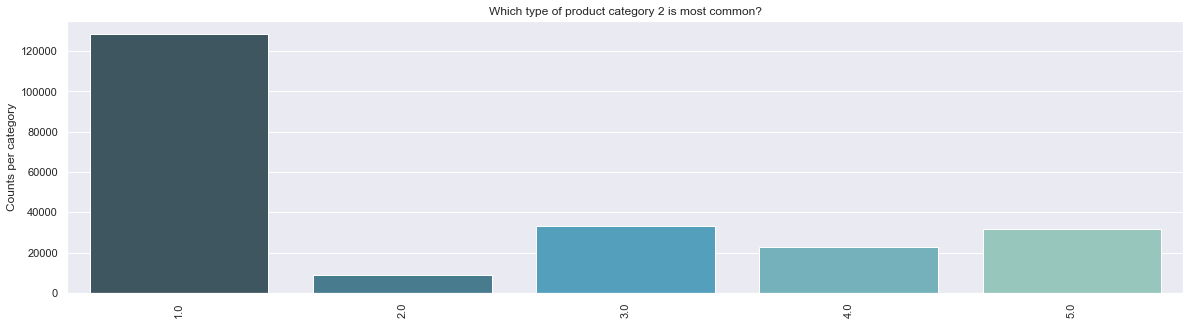

In [77]:
category2_count = data_ht['category_2'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(category2_count.index, category2_count.values, palette="GnBu_d")
plt.ylabel("Counts per category")
plt.title("Which type of product category 2 is most common?");
plt.xticks(rotation=90);

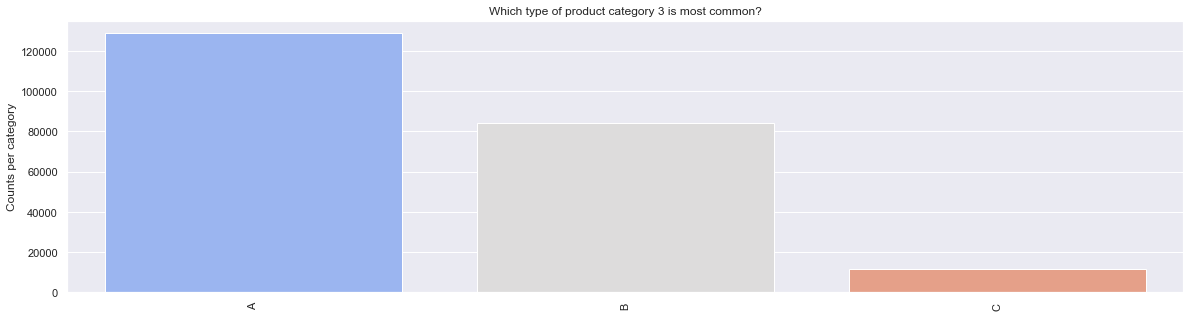

In [78]:
category3_count = data_ht['category_3'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(category3_count.index, category3_count.values, palette= "coolwarm")
plt.ylabel("Counts per category")
plt.title("Which type of product category 3 is most common?");
plt.xticks(rotation=90);

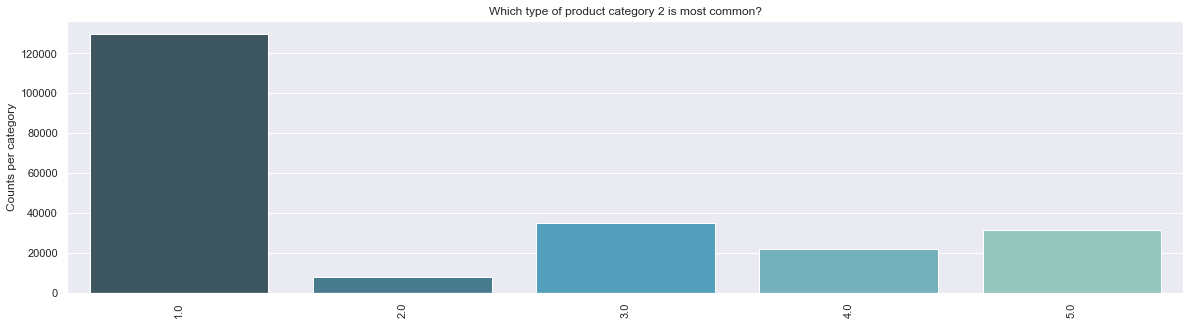

In [79]:
category2_count_new = data_nmt['category_2'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
sns.barplot(category2_count_new.index, category2_count_new.values, palette="GnBu_d")
plt.ylabel("Counts per category")
plt.title("Which type of product category 2 is most common?");
plt.xticks(rotation=90);

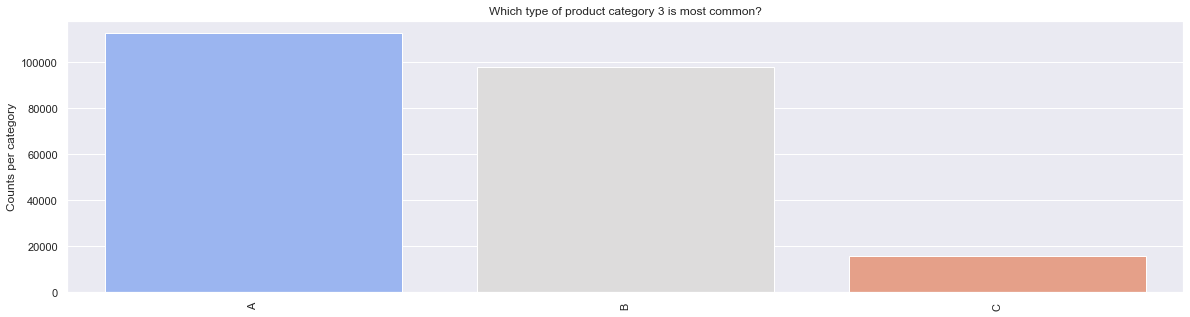

In [80]:
category3_count_new = data_nmt['category_3'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(20,5))
#plt.pie(category3_count_new)
sns.barplot(category3_count_new.index, category3_count_new.values, palette= "coolwarm")
plt.ylabel("Counts per category")
plt.title("Which type of product category 3 is most common?");
plt.xticks(rotation=90);

### Most Common Merchant ID

In [81]:
most_common_merchant = data_ht['merchant_id'].value_counts().sort_values(ascending=False)
most_common_merchant.to_frame()

,merchant_id
M_ID_00a6ca8a8a,8858
M_ID_50f575c681,1567
M_ID_5ba019a379,1426
M_ID_1f4773aa76,916
M_ID_f86439cec0,897
...,...
M_ID_b25d4dea15,1
M_ID_67c94977db,1
M_ID_f2b292e38c,1
M_ID_52d3ac7d0d,1


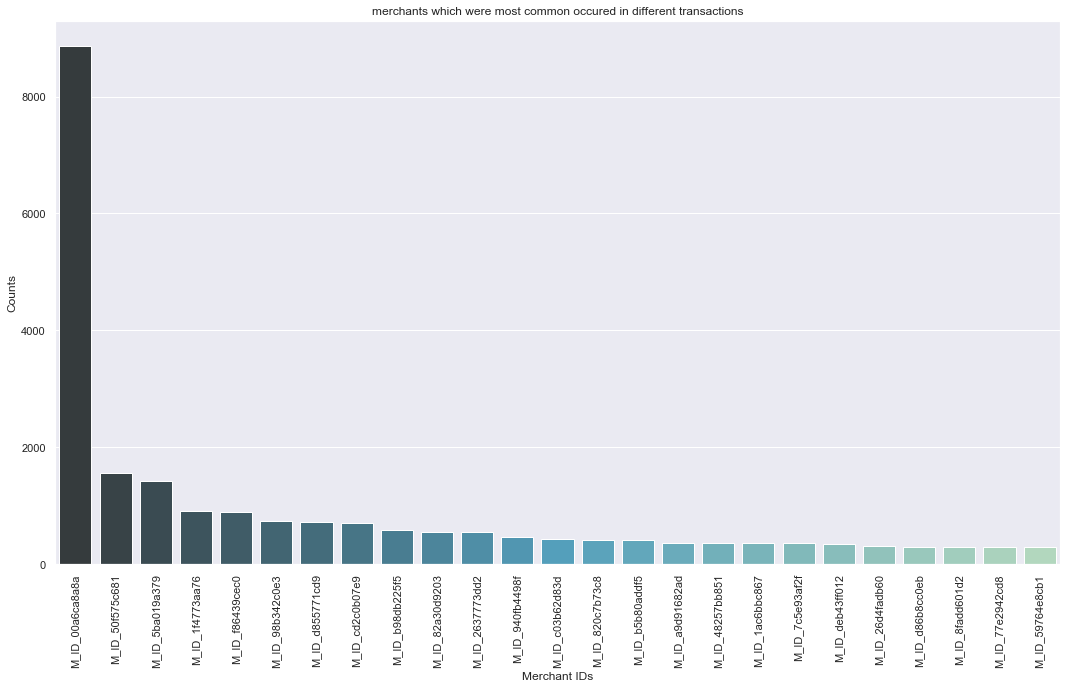

In [82]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
sns.barplot(most_common_merchant.iloc[0:25].index,
            most_common_merchant.iloc[0:25].values,
            ax = ax, palette="GnBu_d")
ax.set_ylabel("Counts")
ax.set_xlabel("Merchant IDs")
ax.set_title("merchants which were most common occured in different transactions");
plt.xticks(rotation=90);

In [83]:
most_common_new_merchant = data_nmt['merchant_id'].value_counts().sort_values(ascending=False)
most_common_new_merchant.to_frame()

,merchant_id
M_ID_00a6ca8a8a,2797
M_ID_cd2c0b07e9,2442
M_ID_50f575c681,1746
M_ID_9139332ccc,1016
M_ID_725a60d404,795
...,...
M_ID_842a2a96d1,1
M_ID_72a5d2d95b,1
M_ID_ea364ff0a0,1
M_ID_0a01da7ec7,1


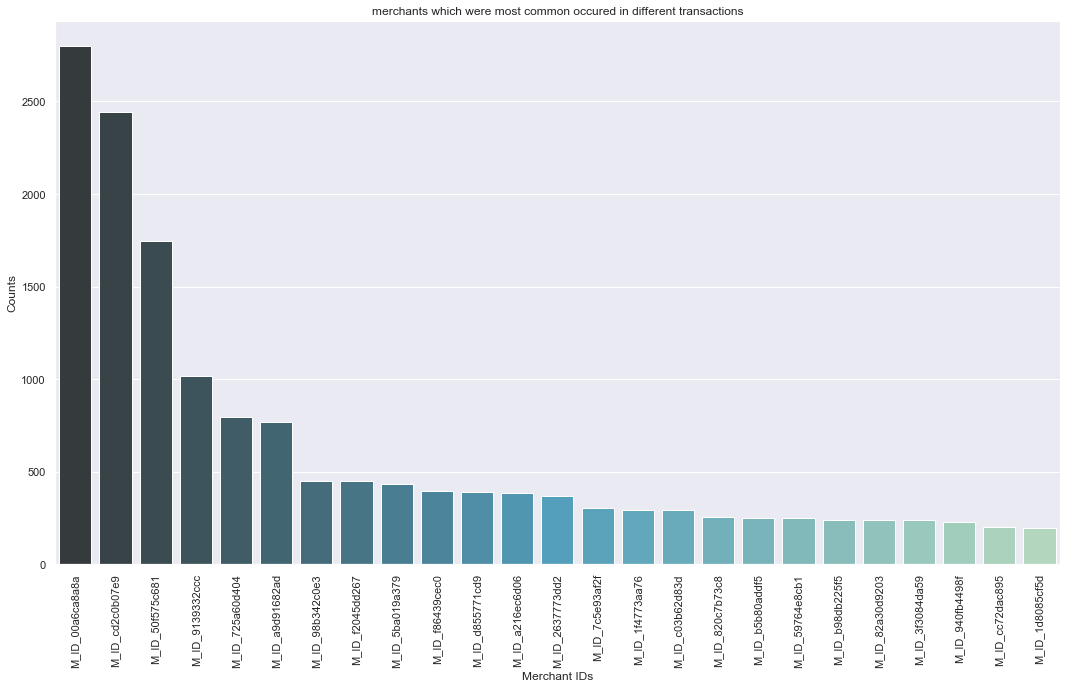

In [84]:
fig, ax = plt.subplots(1,1, figsize=(18,10))
sns.barplot(most_common_new_merchant.iloc[0:25].index,
            most_common_new_merchant.iloc[0:25].values,
            ax = ax, palette="GnBu_d")
ax.set_ylabel("Counts")
ax.set_xlabel("Merchant IDs")
ax.set_title("merchants which were most common occured in different transactions");
plt.xticks(rotation=90);

### Distribution of transactions- Daily basis

In [85]:
data = data_ht.iloc[0:100000]
data.head(10)

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,Year,month,Day,Quarter,Week,Weekday
0,Y,C_ID_1235abf2e9,14,N,0,A,560,M_ID_d88c2ba479,-8,-0.740146,2017-03-23 13:04:43,5.0,20,34,2017,Mar,23,1,12,Wed
1,N,C_ID_a85430af23,33,N,1,B,307,M_ID_4ec1f91e4d,-10,-0.611669,2017-04-18 19:05:05,1.0,15,19,2017,Apr,18,2,16,Mon
2,Y,C_ID_f407be70a5,188,N,1,B,278,M_ID_de68864494,-7,-0.714120,2017-07-04 13:56:06,1.0,9,37,2017,Jul,4,3,27,Mon
4,Y,C_ID_81496e38bf,20,N,0,A,683,M_ID_01b1eec377,-11,-0.689807,2017-03-22 12:46:52,3.0,19,34,2017,Mar,22,1,12,Tue
5,Y,C_ID_0d6ca67cdc,231,N,0,A,278,M_ID_450229118f,-3,-0.726923,2017-03-22 16:31:16,1.0,9,37,2017,Mar,22,1,12,Tue
6,Y,C_ID_d16ce9b6d9,88,N,1,B,278,M_ID_6c10863939,-10,-0.668635,2017-04-19 12:11:56,1.0,16,37,2017,Apr,19,2,16,Tue
7,Y,C_ID_a5f1883b0f,69,N,0,A,80,M_ID_18640ef6eb,-2,-0.740897,2017-12-14 18:58:34,1.0,9,37,2017,Dec,14,4,50,Wed
8,Y,C_ID_0e466f5187,143,N,1,B,108,M_ID_8a87a55b84,-6,-0.686095,2017-08-13 10:35:00,5.0,5,34,2017,Aug,13,3,32,Sat
9,Y,C_ID_93b21078f2,143,N,1,B,222,M_ID_5768173411,-2,-0.316233,2017-12-09 11:59:55,5.0,5,21,2017,Dec,9,4,49,Fri
10,Y,C_ID_f46fcb0feb,17,N,2,C,87,M_ID_6c54f24d6d,0,-0.476581,2018-02-14 21:12:34,4.0,22,27,2018,Feb,14,1,7,Tue


In [86]:
data_new = data_nmt.iloc[0:100000]
data.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,Year,month,Day,Quarter,Week,Weekday
0,Y,C_ID_1235abf2e9,14,N,0,A,560,M_ID_d88c2ba479,-8,-0.740146,2017-03-23 13:04:43,5.0,20,34,2017,Mar,23,1,12,Wed
1,N,C_ID_a85430af23,33,N,1,B,307,M_ID_4ec1f91e4d,-10,-0.611669,2017-04-18 19:05:05,1.0,15,19,2017,Apr,18,2,16,Mon
2,Y,C_ID_f407be70a5,188,N,1,B,278,M_ID_de68864494,-7,-0.714120,2017-07-04 13:56:06,1.0,9,37,2017,Jul,4,3,27,Mon
4,Y,C_ID_81496e38bf,20,N,0,A,683,M_ID_01b1eec377,-11,-0.689807,2017-03-22 12:46:52,3.0,19,34,2017,Mar,22,1,12,Tue
5,Y,C_ID_0d6ca67cdc,231,N,0,A,278,M_ID_450229118f,-3,-0.726923,2017-03-22 16:31:16,1.0,9,37,2017,Mar,22,1,12,Tue


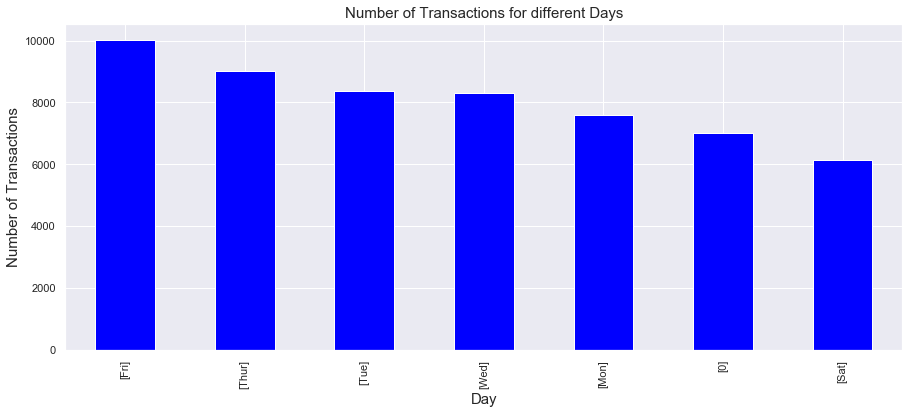

In [393]:
Daily_transactions = data.groupby('card_id')['Weekday'].unique().value_counts().iloc[0:7].plot(kind='bar',color='blue',figsize=(15,6))
Daily_transactions_csv = data.groupby('card_id')['Weekday'].unique().value_counts().iloc[0:7]
Daily_transactions.set_xlabel('Day',fontsize=15)
Daily_transactions.set_ylabel('Number of Transactions',fontsize=15)
Daily_transactions.set_title('Number of Transactions for different Days',fontsize=15)
plt.xticks(rotation=90);
Daily_transactions_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Daily_transactions.csv')

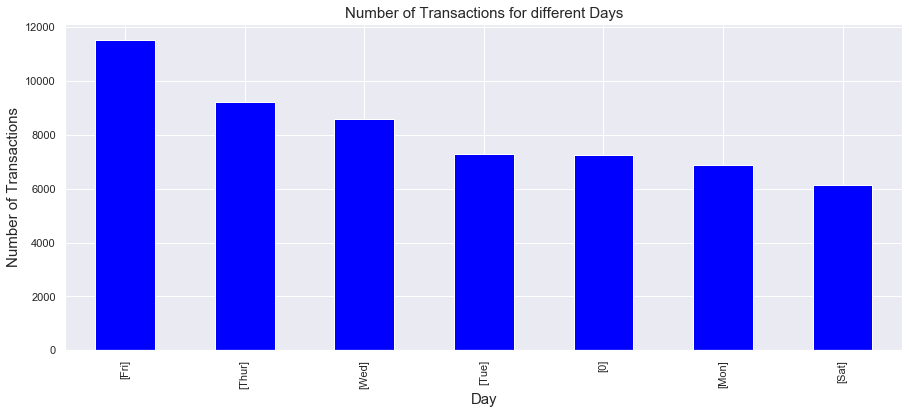

In [394]:
Daily_transactions_new = data_new.groupby('card_id')['Weekday'].unique().value_counts().iloc[0:7].plot(kind='bar',color='blue',figsize=(15,6))
Daily_transactions_new_csv = data_new.groupby('card_id')['Weekday'].unique().value_counts().iloc[0:7]
Daily_transactions_new.set_xlabel('Day',fontsize=15)
Daily_transactions_new.set_ylabel('Number of Transactions',fontsize=15)
Daily_transactions_new.set_title('Number of Transactions for different Days',fontsize=15)
plt.xticks(rotation=90);
Daily_transactions_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Daily_transactions_new.csv')

### Distribution of transactions- Monthly basis

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


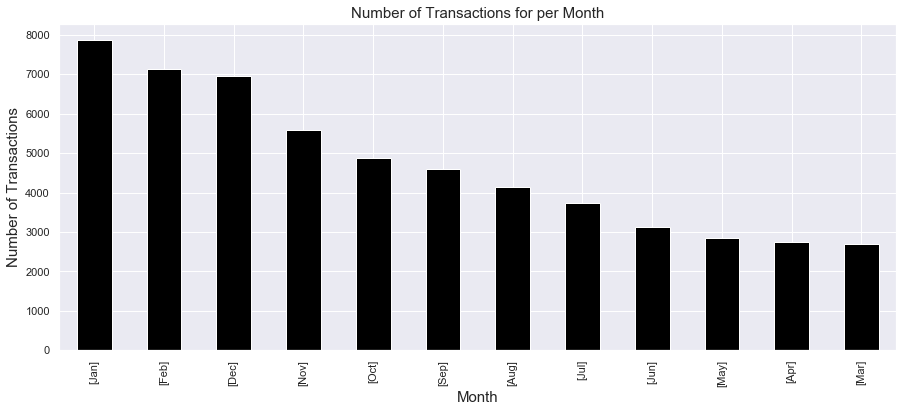

In [89]:
Monthly_transactions = data.groupby('card_id')['month'].unique().value_counts().iloc[0:12].plot(kind ='bar',color='black',figsize=(15,6))
Monthly_transactions_csv = data.groupby('card_id')['month'].unique().value_counts().iloc[0:12]
Monthly_transactions.set_xlabel('Month',fontsize=15)
Monthly_transactions.set_ylabel('Number of Transactions',fontsize=15)
Monthly_transactions.set_title('Number of Transactions for per Month',fontsize=15)
plt.xticks();
Monthly_transactions_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Monthly_transactions.csv')

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


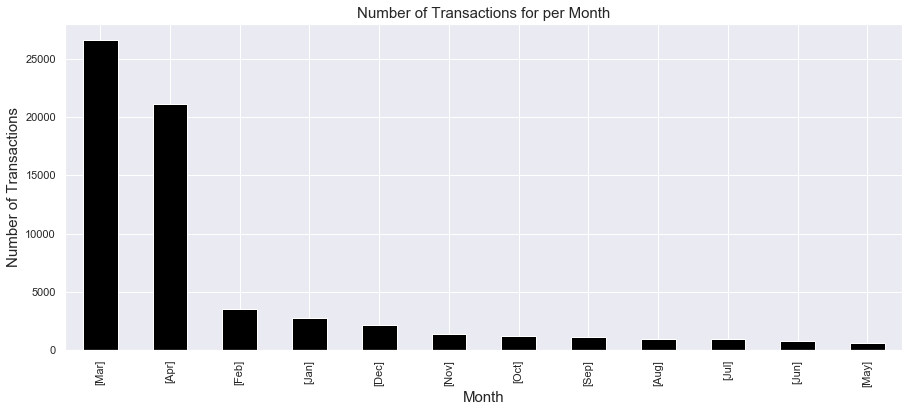

In [90]:
Monthly_transactions_new = data_new.groupby('card_id')['month'].unique().value_counts().iloc[0:12].plot(kind ='bar',color='black',figsize=(15,6))
Monthly_transactions_new_csv = data_new.groupby('card_id')['month'].unique().value_counts().iloc[0:12]
Monthly_transactions_new.set_xlabel('Month',fontsize=15)
Monthly_transactions_new.set_ylabel('Number of Transactions',fontsize=15)
Monthly_transactions_new.set_title('Number of Transactions for per Month',fontsize=15)
plt.xticks();
Monthly_transactions_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Monthly_transactions_new.csv')

### Distribution of transactions- Weekly basis

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


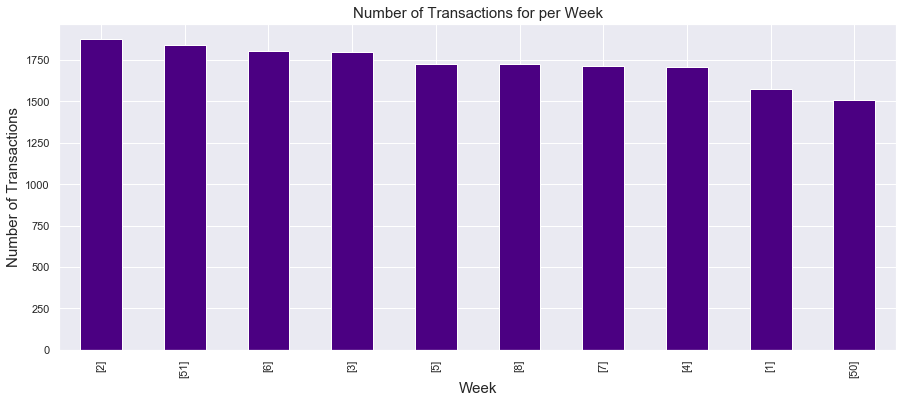

In [91]:
Weekly_transactions = data.groupby('card_id')['Week'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='indigo',figsize=(15,6))
Weekly_transactions_csv = data.groupby('card_id')['Week'].unique().value_counts().iloc[0:10]
Weekly_transactions.set_xlabel('Week',fontsize=15)
Weekly_transactions.set_ylabel('Number of Transactions',fontsize=15)
Weekly_transactions.set_title('Number of Transactions for per Week',fontsize=15)
plt.xticks(rotation=90);
Weekly_transactions_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Weekly_transactions.csv')

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


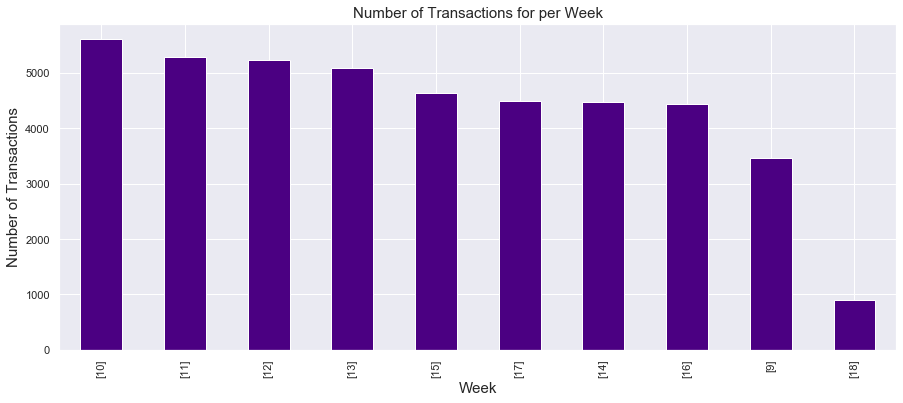

In [92]:
Weekly_transactions_new = data_new.groupby('card_id')['Week'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='indigo',figsize=(15,6))
Weekly_transactions_new_csv = data_new.groupby('card_id')['Week'].unique().value_counts().iloc[0:10]
Weekly_transactions_new.set_xlabel('Week',fontsize=15)
Weekly_transactions_new.set_ylabel('Number of Transactions',fontsize=15)
Weekly_transactions_new.set_title('Number of Transactions for per Week',fontsize=15)
plt.xticks(rotation=90);
Weekly_transactions_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/Weekly_transactions_new.csv')

### Distribution of Transactions: city wise

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


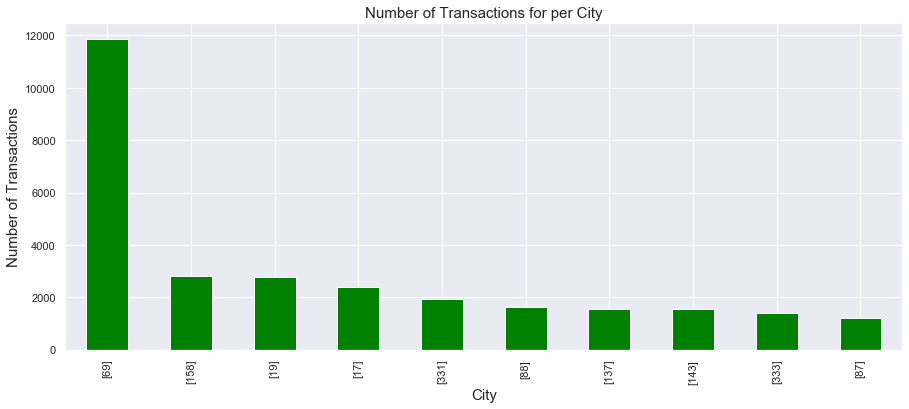

In [93]:
transactions_city = data.groupby('card_id')['city_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='green',figsize=(15,6))
transactions_city_csv = data.groupby('card_id')['city_id'].unique().value_counts().iloc[0:10]
transactions_city.set_xlabel('City',fontsize=15)
transactions_city.set_ylabel('Number of Transactions',fontsize=15)
transactions_city.set_title('Number of Transactions for per City',fontsize=15)
plt.xticks(rotation=90);
transactions_city_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_city.csv')

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


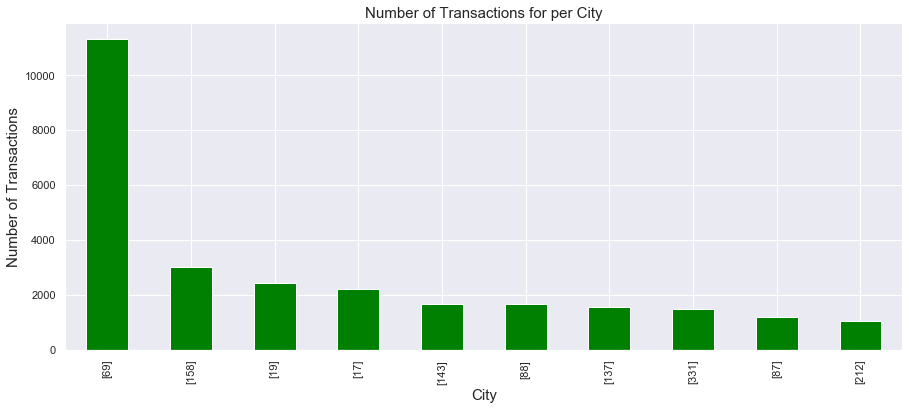

In [94]:
transactions_city_new = data_new.groupby('card_id')['city_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='green',figsize=(15,6))
transactions_city_new_csv = data_new.groupby('card_id')['city_id'].unique().value_counts().iloc[0:10]
transactions_city_new.set_xlabel('City',fontsize=15)
transactions_city_new.set_ylabel('Number of Transactions',fontsize=15)
transactions_city_new.set_title('Number of Transactions for per City',fontsize=15)
plt.xticks(rotation=90);
transactions_city_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_city_new.csv')

### Distribution of Transactions: State wise

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


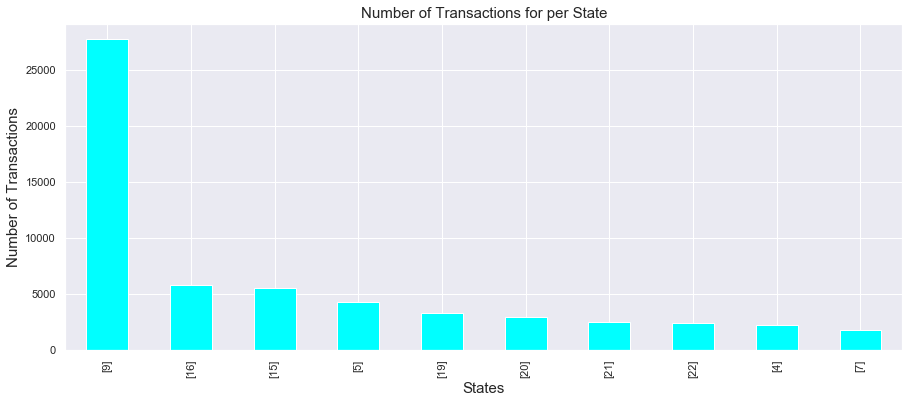

In [95]:
transactions_state = data.groupby('card_id')['state_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='cyan',figsize=(15,6))
transactions_state_csv = data.groupby('card_id')['state_id'].unique().value_counts().iloc[0:10]
transactions_state.set_xlabel('States',fontsize=15)
transactions_state.set_ylabel('Number of Transactions',fontsize=15)
transactions_state.set_title('Number of Transactions for per State',fontsize=15)
plt.xticks(rotation=90);
transactions_state_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_state.csv')

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


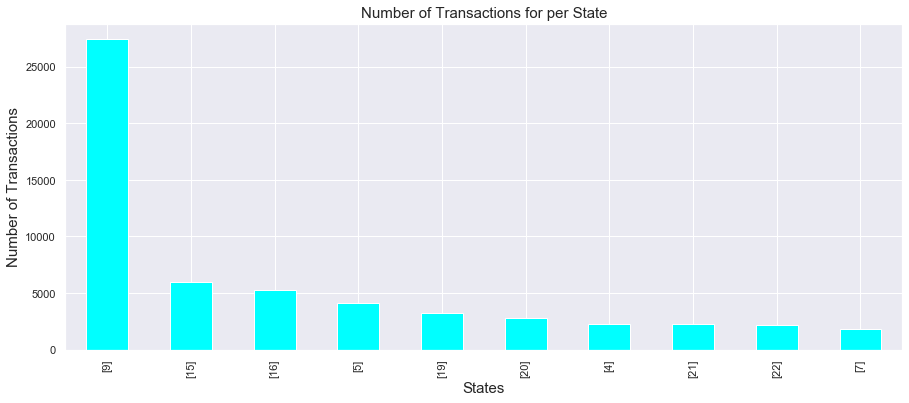

In [96]:
transactions_state_new = data_new.groupby('card_id')['state_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='cyan',figsize=(15,6))
transactions_state_new_csv = data_new.groupby('card_id')['state_id'].unique().value_counts().iloc[0:10]
transactions_state_new.set_xlabel('States',fontsize=15)
transactions_state_new.set_ylabel('Number of Transactions',fontsize=15)
transactions_state_new.set_title('Number of Transactions for per State',fontsize=15)
plt.xticks(rotation=90);
transactions_state_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_state_new.csv')

### Distribution of Transactions: Subsector wise

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


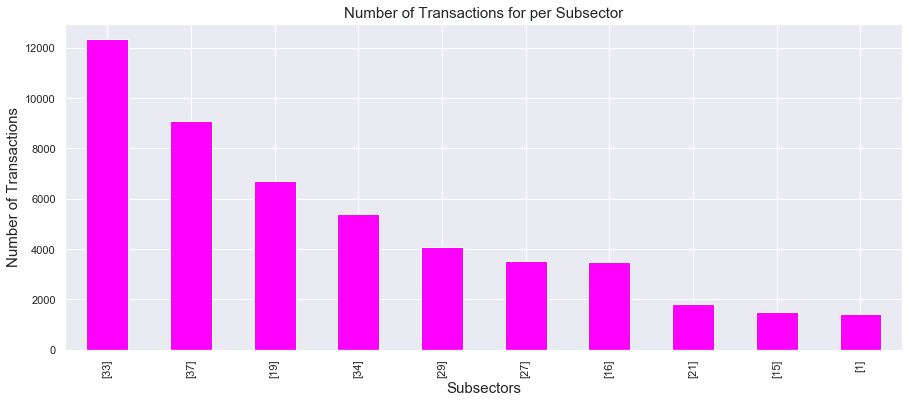

In [97]:
transactions_subsector = data.groupby('card_id')['subsector_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='magenta',figsize=(15,6))
transactions_subsector_csv = data.groupby('card_id')['subsector_id'].unique().value_counts().iloc[0:10]
transactions_subsector.set_xlabel('Subsectors',fontsize=15)
transactions_subsector.set_ylabel('Number of Transactions',fontsize=15)
transactions_subsector.set_title('Number of Transactions for per Subsector',fontsize=15)
plt.xticks(rotation=90);
transactions_subsector_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_subsector.csv')

C:\Users\prath\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


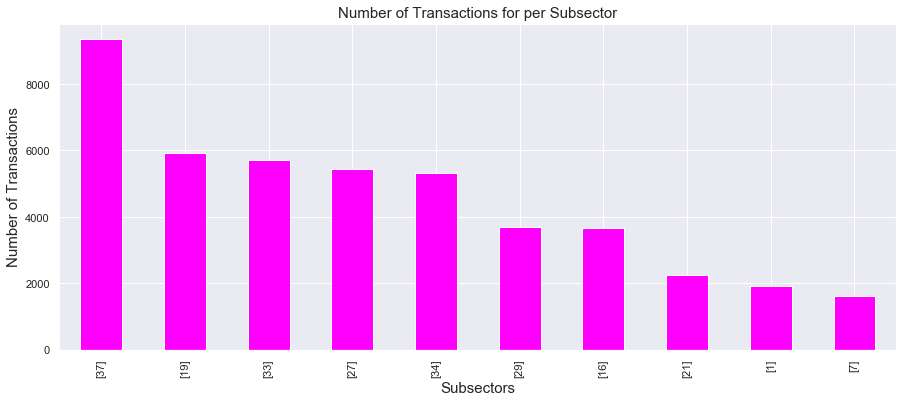

In [98]:
transactions_subsector_new = data_new.groupby('card_id')['subsector_id'].unique().value_counts().iloc[0:10].plot(kind ='bar',color='magenta',figsize=(15,6))
transactions_subsector_new_csv = data_new.groupby('card_id')['subsector_id'].unique().value_counts().iloc[0:10]
transactions_subsector_new.set_xlabel('Subsectors',fontsize=15)
transactions_subsector_new.set_ylabel('Number of Transactions',fontsize=15)
transactions_subsector_new.set_title('Number of Transactions for per Subsector',fontsize=15)
plt.xticks(rotation=90);
transactions_subsector_new_csv.to_csv('C:/Users/prath/Downloads/CSV_files/transactions_subsector_new.csv')

## RECENCY, FREQUENCY, MONITORY VALUES

Recency - This represents the age of the customer when they made their latest transactions. (Current_date - last_transaction_date)

Frequency - This represents the total number of transactions/number of visits a customer has made. (Count of total transactions)

Monitary - This represents the total purchase amount that a specified customer has made. (Sum of purchase_amt)

Time - This represents the age of the customer. Time span between a customer’s first and last transaction.

In [364]:
from datetime import datetime

In [365]:
z = data_ht.groupby('card_id')['purchase_date'].max().reset_index()
y = data_ht.groupby('card_id')['purchase_date'].min().reset_index()

In [366]:
z.columns = ['card_id', 'Max']
y.columns = ['card_id', 'Min']

In [367]:
now = datetime.now()
curr_date = now.strftime("%m-%d-%Y, %H:%M:%S")
curr_date = pd.to_datetime(curr_date)

In [368]:
rec = pd.merge(z,y,how = 'left',on = 'card_id')
rec['Min'] = pd.to_datetime(rec['Min'])
rec['Max'] = pd.to_datetime(rec['Max'])

In [369]:
rec['Recency'] = (curr_date - rec['Max']).astype('timedelta64[D]')

In [370]:
rec['Time'] = (rec['Max'] - rec['Min']).astype('timedelta64[D]')

In [371]:
rec = rec[['card_id','Time','Recency']]
rec.sort_values(by = 'Time', ascending = False).head(5)

,card_id,Time,Recency
29756,C_ID_3ca66590f6,421.0,829.0
17421,C_ID_23919b3580,421.0,828.0
31040,C_ID_3f49dbb168,421.0,828.0
87400,C_ID_b1c61e31c7,420.0,829.0
81876,C_ID_a679e9ae83,420.0,829.0


In [372]:
freq = data_ht.groupby('card_id').size().reset_index()
freq.columns = ['card_id', 'Frequency']
freq.sort_values(by = 'Frequency', ascending = False).head(5)

,card_id,Frequency
100280,C_ID_cc3d4cd4e3,24
6215,C_ID_0cd2ce025c,21
81951,C_ID_a69da486b8,21
63405,C_ID_80c1c711c9,20
19175,C_ID_272aa0597a,19


In [373]:
data_ht.purchase_amount += 0.75

In [374]:
mon = data_ht.groupby('card_id')['purchase_amount'].sum().reset_index()
mon.columns = ['card_id', 'Monitary']
mon.sort_values(by = 'Monitary', ascending = False).head(5)

,card_id,Monitary
70241,C_ID_8eb97da9da,48090.089996
109870,C_ID_dfada69aa2,42085.421926
41382,C_ID_54707b0914,12031.074815
121513,C_ID_f7621c5e17,9929.383120
116793,C_ID_edca884f4a,8436.988117


In [375]:
final = pd.merge(freq,mon,how = 'left', on = 'card_id')
final = pd.merge(final,rec,how = 'left', on = 'card_id')

final['AOV'] = final['Monitary']/final['Frequency'] ## AOV - Average order value (i.e) total_purchase_amt/total_trans

final.sort_values(by = 'AOV', ascending = False).head(5)

,card_id,Frequency,Monitary,Time,Recency,AOV
70241,C_ID_8eb97da9da,2,48090.089996,55.0,902.0,24045.044998
109870,C_ID_dfada69aa2,4,42085.421926,316.0,893.0,10521.355482
41382,C_ID_54707b0914,4,12031.074815,344.0,840.0,3007.768704
116793,C_ID_edca884f4a,3,8436.988117,57.0,985.0,2812.329372
121513,C_ID_f7621c5e17,5,9929.383120,112.0,840.0,1985.876624


#### Profit Margin

In [376]:
final['profit_margin']=final['Frequency']*0.10
final.sort_values(by = 'profit_margin', ascending = False).head(5)

,card_id,Frequency,Monitary,Time,Recency,AOV,profit_margin
100280,C_ID_cc3d4cd4e3,24,58.661912,400.0,843.0,2.444246,2.4
6215,C_ID_0cd2ce025c,21,48.553256,305.0,926.0,2.312060,2.1
81951,C_ID_a69da486b8,21,50.590731,208.0,850.0,2.409082,2.1
63405,C_ID_80c1c711c9,20,46.276542,315.0,837.0,2.313827,2.0
19175,C_ID_272aa0597a,19,45.227945,364.0,878.0,2.380418,1.9


#### Purchase Frequency

In [377]:
purchase_frequency=sum(final['Frequency'])/final.shape[0]
purchase_frequency

1.784447747196414

#### Repeat Rate

In [378]:
repeat_rate=final[final.Frequency > 1].shape[0]/final.Monitary.shape[0]
repeat_rate

0.40962955309527027

#### Churn Rate

In [379]:
churn_rate=1-repeat_rate
churn_rate

0.5903704469047297

#### Customer Value

In [380]:
final['CLV']=(final['AOV']*purchase_frequency)/churn_rate
final.sort_values(by = 'CLV', ascending = False).head(5)

,card_id,Frequency,Monitary,Time,Recency,AOV,profit_margin,CLV
70241,C_ID_8eb97da9da,2,48090.089996,55.0,902.0,24045.044998,0.2,72678.310039
109870,C_ID_dfada69aa2,4,42085.421926,316.0,893.0,10521.355482,0.4,31801.742762
41382,C_ID_54707b0914,4,12031.074815,344.0,840.0,3007.768704,0.4,9091.251291
116793,C_ID_edca884f4a,3,8436.988117,57.0,985.0,2812.329372,0.3,8500.518342
121513,C_ID_f7621c5e17,5,9929.383120,112.0,840.0,1985.876624,0.5,6002.490617


In [381]:
#Customer Lifetime Value
final['cust_lifetime_value']=final['CLV']*final['profit_margin']
final.sort_values(by = 'cust_lifetime_value', ascending = False).head(5)

,card_id,Frequency,Monitary,Time,Recency,AOV,profit_margin,CLV,cust_lifetime_value
70241,C_ID_8eb97da9da,2,48090.089996,55.0,902.0,24045.044998,0.2,72678.310039,14535.662008
109870,C_ID_dfada69aa2,4,42085.421926,316.0,893.0,10521.355482,0.4,31801.742762,12720.697105
41382,C_ID_54707b0914,4,12031.074815,344.0,840.0,3007.768704,0.4,9091.251291,3636.500516
121513,C_ID_f7621c5e17,5,9929.383120,112.0,840.0,1985.876624,0.5,6002.490617,3001.245308
116793,C_ID_edca884f4a,3,8436.988117,57.0,985.0,2812.329372,0.3,8500.518342,2550.155503


In [382]:
pip install lifetimes

Note: you may need to restart the kernel to use updated packages.


In [383]:
quantiles = final.quantile(q=[0.25,0.5,0.75,0.90])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 1.0, 0.5: 1.0, 0.75: 2.0, 0.9: 3.0},
 'Monitary': {0.25: 2.3019283699999997,
  0.5: 2.49700254,
  0.75: 4.78297276,
  0.9: 7.70098811},
 'Time': {0.25: 0.0, 0.5: 0.0, 0.75: 81.0, 0.9: 209.0},
 'Recency': {0.25: 882.0, 0.5: 944.0, 0.75: 1046.0, 0.9: 1149.0},
 'AOV': {0.25: 2.28496344,
  0.5: 2.321893596666667,
  0.75: 2.40335732,
  0.9: 2.57102314},
 'profit_margin': {0.25: 0.1, 0.5: 0.1, 0.75: 0.2, 0.9: 0.30000000000000004},
 'CLV': {0.25: 6.906507404480823,
  0.5: 7.018132122846983,
  0.75: 7.264363549813816,
  0.9: 7.771148563104159},
 'cust_lifetime_value': {0.25: 0.6957785430470376,
  0.5: 0.7547414645512851,
  0.75: 1.445696513304829,
  0.9: 2.3276928843786573}}

In [384]:
def RScore(x,p,d):
    if x <= d[p][0.25]: 
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    elif x <= d[p][0.90]:
        return 4
    else:
        return 5

In [385]:
def FMScore(x,p,d):
    if x <= d[p][0.25]: 
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    elif x <= d[p][0.90]:
        return 4
    else:
        return 5

In [386]:
final['r_quantile'] = final['Recency'].apply(RScore, args=('Recency',quantiles))
final['f_quantile'] = final['Frequency'].apply(FMScore, args=('Frequency',quantiles))
final['m_quantile'] = final['Monitary'].apply(FMScore, args=('Monitary',quantiles))
final['RFMindex'] = final.r_quantile.map(str)+final.f_quantile.map(str)+final.m_quantile.map(str)                       
final['RFMScore'] = final.r_quantile+final.f_quantile+final.m_quantile 
final.sort_values(by = 'RFMScore', ascending = False).head()

,card_id,Frequency,Monitary,Time,Recency,AOV,profit_margin,CLV,cust_lifetime_value,r_quantile,f_quantile,m_quantile,RFMindex,RFMScore
103438,C_ID_d2aa92e52e,4,9.669448,30.0,1181.0,2.417362,0.4,7.306694,2.922678,5,5,5,555,15
82775,C_ID_a859e7f1dc,4,9.151800,36.0,1199.0,2.287950,0.4,6.915534,2.766214,5,5,5,555,15
7596,C_ID_0fc4e70162,4,9.324920,38.0,1155.0,2.331230,0.4,7.046352,2.818541,5,5,5,555,15
60184,C_ID_7a31f1bd59,6,14.014248,51.0,1188.0,2.335708,0.6,7.059887,4.235932,5,5,5,555,15
18489,C_ID_25bc62eeae,4,9.109290,77.0,1170.0,2.277322,0.4,6.883412,2.753365,5,5,5,555,15


In [388]:
final['RFMScore'].value_counts().sort_values(ascending=False)

7     18908
5     17332
6     16237
8     14081
4     13175
9     12994
11    10469
10     8399
3      6124
12     5069
13     2397
14      557
15       79
Name: RFMScore, dtype: int64

In [389]:
# Define rfm_level function
def rfm(df):
    if df['RFMScore'] >= 10:
        return 'Can\'t Loose Them'
    elif ((df['RFMScore'] >= 8) and (df['RFMScore'] < 10)):
        return 'Champions'
    elif ((df['RFMScore'] >= 7) and (df['RFMScore'] < 8)):
        return 'Loyal'
    elif ((df['RFMScore'] >= 6) and (df['RFMScore'] < 7)):
        return 'Potential'
    elif ((df['RFMScore'] >= 5) and (df['RFMScore'] < 6)):
        return 'Promising'
    elif ((df['RFMScore'] >= 4) and (df['RFMScore'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
final['RFM_Level'] = final.apply(rfm, axis=1)
# Print the header with top 5 rows to the console
final.sort_values(by = 'RFMScore', ascending = False).head()

,card_id,Frequency,Monitary,Time,Recency,AOV,profit_margin,CLV,cust_lifetime_value,r_quantile,f_quantile,m_quantile,RFMindex,RFMScore,RFM_Level
103438,C_ID_d2aa92e52e,4,9.669448,30.0,1181.0,2.417362,0.4,7.306694,2.922678,5,5,5,555,15,Can't Loose Them
82775,C_ID_a859e7f1dc,4,9.151800,36.0,1199.0,2.287950,0.4,6.915534,2.766214,5,5,5,555,15,Can't Loose Them
7596,C_ID_0fc4e70162,4,9.324920,38.0,1155.0,2.331230,0.4,7.046352,2.818541,5,5,5,555,15,Can't Loose Them
60184,C_ID_7a31f1bd59,6,14.014248,51.0,1188.0,2.335708,0.6,7.059887,4.235932,5,5,5,555,15,Can't Loose Them
18489,C_ID_25bc62eeae,4,9.109290,77.0,1170.0,2.277322,0.4,6.883412,2.753365,5,5,5,555,15,Can't Loose Them


In [390]:
rfm_level_agg = final.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monitary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monitary       
                      mean      mean     mean  count
RFM_Level                                           
Can't Loose Them     977.0       3.6     13.3  26970
Champions            991.4       1.8      4.7  27075
Loyal               1028.7       1.3      3.2  18908
Needs Attention      887.0       1.0      2.3  13175
Potential           1014.6       1.0      2.4  16237
Promising            943.7       1.0      2.4  17332
Require Activation   855.1       1.0      2.3   6124


<Figure size 864x720 with 0 Axes>

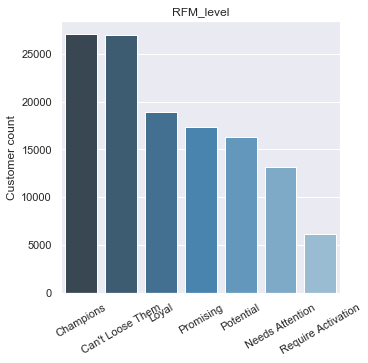

In [392]:
plt.figure(figsize = (12,10))
total_cust = final['RFM_Level'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(total_cust.index, total_cust.values, palette="Blues_d")
plt.ylabel("Customer count")
plt.title("RFM_level");
plt.xticks(rotation=30);
plt.savefig('C:/Users/prath/Downloads/CSV_files/rfm.jpg')